# Lab activity 1: Libraries

This lab activity is adapted (or, taken almost wholesale) from 
chapter 1 of Mueller and Guido, 
<i>Introduction to Machine Learning with Python</i>, see 
[the book's  github site](https://github.com/amueller/introduction_to_ml_with_python).
 
 The goal of this activitiy is to familiarize you with the libraries we will use in our examples and other exercises.
 
 I'm trying this out as a Jupyter notebook. I don't know whether we'll stick with this or not. 
 Let me know what you think.
 As you go along in the notebook, execute code by highlighting the cell and clikcing "Run." 
 You should make additions to the code to try things out for yourself.

## 1. The NumPy library

Numpy library is widely used for numeric computation in Python.
Most importantly it provides arrays.

In [1]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

# The shape attribute gives the size of the dimensions.
x.shape

x:
[[1 2 3]
 [4 5 6]]


(2, 3)

Decide with your partner on how you will pronounce <i>numpy</i>.

## 2. The SciPy library 

The SciPy library supports efficient storage of sparse matrices. You may use CSR (compressed sparse row) or COO (coordinate) format. 

In [6]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [12]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [4]:
# Make the same matrix using COO format
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Try out some matrix multiplication.

## 3. The MatPlotLib library

We'll use matplotlib for visualizing data. This example plots a sine function.

[ 0.54402111 -0.84078711 -0.53870529  0.84419304  0.53336793 -0.84756522
 -0.52800926  0.85090352  0.52262947 -0.85420782 -0.5172288   0.85747796
  0.51180745 -0.86071383 -0.50636564]


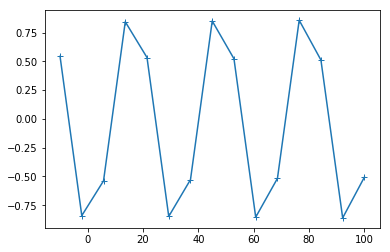

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 100, 15)
# Create a second array using sine
y = np.sin(x)
print(y)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="+")

Change the code above and re-run it.

## 4.  The Pandas library

The pandas library is for data analysis. If any of you have used R before, you are familiar with the idea of a data frame. Pandas provides a similar data structure. It is very flexible, like a spreadsheet or relational database.
See if you can get the basic idea from examples:

In [27]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


In [31]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])
print(data_pandas)

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


   Age  Location   Name
0   24  New York   John
1   13     Paris   Anna
2   53    Berlin  Peter
3   33    London  Linda


Experiment with other queries, and make your own dataframe.

## 5. The Scikit-learn library

The scikit-learn library contains implementations of various machine learning algorithms and other things to support machine learning. Included in the library are some datasets that we can experiment. In this exercise we're using a dataset about the measurments of iris plants. We will train a model to predict the species of iris from measurments of parts of the plant. In case you don't remember flower anatomy:

![sepal_petal](images/iris_petal_sepal.png)

We can load the dataset and retrieve some information from it:

In [32]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [33]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target_names', 'filename', 'target', 'feature_names', 'DESCR'])


In [54]:
print(iris_dataset['DESCR'][:193] + "\n...")
print(iris_dataset['feature_names'][:1000] + "")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


TypeError: can only concatenate list (not "str") to list

In [55]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [56]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [57]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [58]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [59]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [60]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [61]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [62]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Discuss this with your partner and make sure you understand it.

## 6 Data for training and testing

Split the data into a training set and a test set, which can be done with sklearn's train_test_split. Then look at the training and test sets that result.

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [87]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [116]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_test shape:", y_test)

X_test shape: (38, 4)
y_test shape: (38,)
y_test shape: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


NameError: name 'X_pred' is not defined

##  7. Look at the Data

Before feeding the data into a machine that builds a model, let's get an intuitive sense of the data. This code will make a grid of scatter plots, each plotting two different measurements (features/attributes) in the training data against each other, with colors indicating the different species---or, in the places in the grid where an attribute would be plotted against itself, the scatter plot is replaced with a histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdae24f0860>,
      dtype=object)

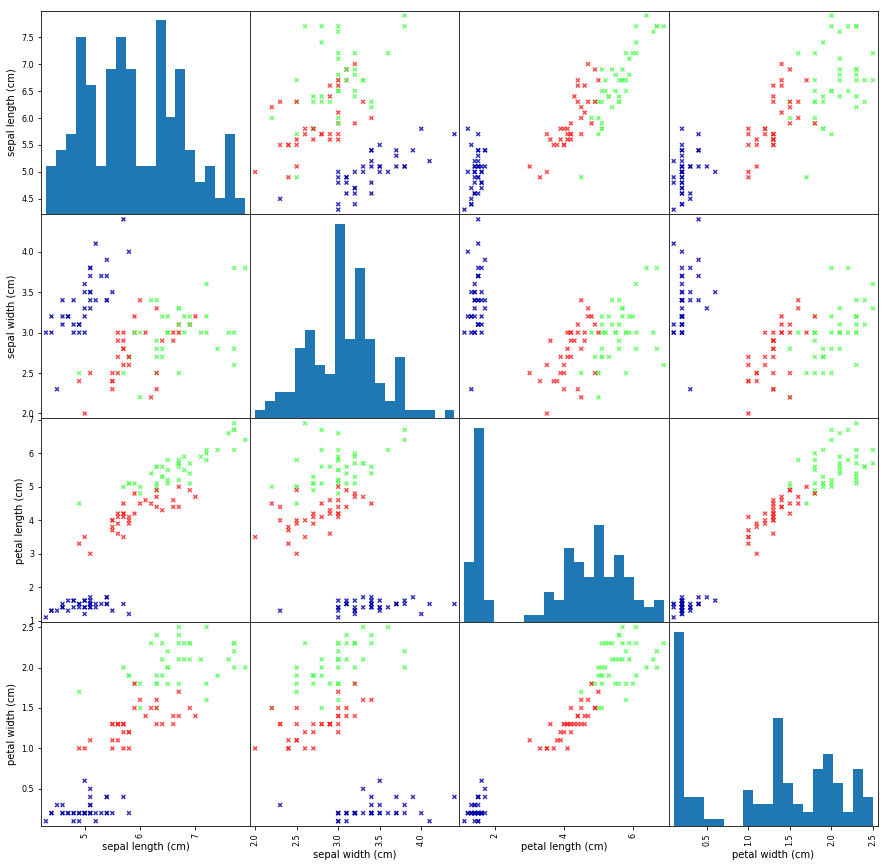

In [102]:
import mglearn
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='x', hist_kwds={'bins': 20}, s=15,
                           alpha=.8, cmap=mglearn.cm3)

From these plots, does it appear that these attributes are useful for separating the observations into classes? Are some attributes better than others?

## 2. Building a k-Nearest Neighbors models

In class some days ago I deomonstrated building a k-Nearest Neighbors model. Now try this out on your own. 
Make a classifier object and train it.

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [99]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

## 9. Making Predictions

Try the model on a new observation. In the code given below, the hypothetical iris specimen has a sepal that is 5 cm long and 2.9 cm wide and a petal that is 1 cm long and .2 cm wide, but try it on different data.

In [100]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [101]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


## 10. Evaluating the Model

Predicting the class of hypotheticla specimens doesn't evaluate the model rigorously. Instead, conduct predictions on the set held-out for testing and compute the model's accuracy.

In [103]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [119]:
print("Test set score: {:.2f}".format(np.mean(y_pred != y_test)))
print(y_pred != y_test)
print(X_test[1])

Test set score: 0.03
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True]
[6.  2.2 4.  1. ]


In [105]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## 11. Your turn

With the time remaining, experiment with the parameters to see how it affects the accuracy of the results. For reference, here's as succinct version of the relevant code for you to modify.

In [150]:

for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=0)



    knn = KNeighborsClassifier(leaf_size=i,n_neighbors=1,p=i,weights='distance',algorithm='brute')
    knn.fit(X_train, y_train)

    print("Test set score: {:.5f}".format(knn.score(X_test, y_test)))

Test set score: 0.97368
Test set score: 0.97368
Test set score: 0.97368
Test set score: 0.97368
Test set score: 0.97368
Test set score: 0.97368
Test set score: 0.97368
Test set score: 0.97368
Test set score: 0.97368
